<a href="https://colab.research.google.com/github/liamhall64/Habitable-Exomoons/blob/main/Orbital_Simulations_and_TTVs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from astropy import constants as c
from astropy import units as u
import matplotlib.pyplot as plt
#%matplotlib notebook

### Source for the Moon parameters:
##### The Constitution and Structure of the Lunar Interior, Wieczorek et al. (2006)

In [ ]:
P = 365.25*u.day
P = P.to(u.s)
P_pm = 27.321582*u.day
P_pm = P_pm.to(u.s)

a = 1*u.au # 1 AU
a = a.to(u.m) #1 AU IN METRES
Mp = 1*u.Mearth # EARTH MASS
Mp = Mp.to(u.kg)
Mm = 73.4767e21*u.kg # MOON MASS
dpm = 384399000*u.m # MOON-EARTH DISTANCE

dp = dpm/(1+(Mp/Mm)) # DIST BARYCENTRE TO PLANET
dm = dpm/(1+(Mm/Mp)) # DIST BARYCENTRE TO MOON

t = np.linspace(0, 2*P, 1000)

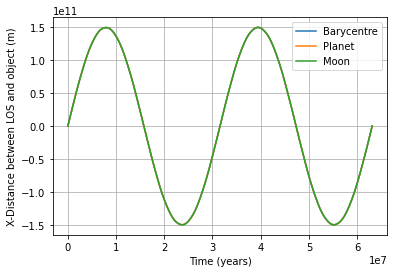

In [ ]:
# BARYCENTRE
ab = 1.496e11 *u.m
Pb = 365.25*86400 *u.s
wb = (2*np.pi/Pb) *u.rad
alphab = wb*t
xb = ab*np.sin(alphab)

plt.plot(t, xb, label = 'Barycentre')



# PLANET
#ap = 1.496e11 *u.m
wp = 2*np.pi/P_pm *u.rad
alphap = wp*t
xp = dp*np.sin(alphap) + xb

plt.plot(t, xp, label = 'Planet')


# MOON
ap = 1.496e11 *u.m
Pp = 365.25*86400 *u.s
wm = 2*np.pi/P_pm *u.rad
alpham = wm*t + np.pi*u.rad
xm = dm*np.sin(alpham) + xb

plt.plot(t, xm, label = 'Moon')


plt.xlabel('Time (years)')
plt.ylabel('X-Distance between LOS and object (m)')
plt.grid()
plt.legend()
plt.show()

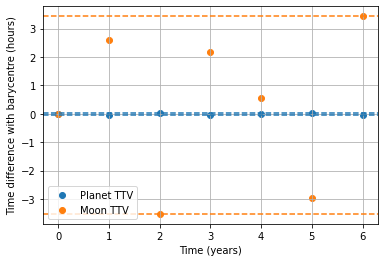

In [ ]:
N = 7 # NUMBER OF TRANSITS
t = np.arange(0,N*P.value,P.value)*P.unit # TIME

alphab = wb*t # PLUS A RANDOM UNIFORM NUMBER FOR ANGLE BETWEEN 0-359 - KNOWN AS A REALISATION
xb = ab*np.sin(alphab)

alphap = wp*t
xp = dp*np.sin(alphap) + xb

alpham = wm*t + np.pi*u.rad
xm = dm*np.sin(alpham) + xb

#print(xb)
#print(xp)
#print(xm)

diffp = xb - xp
diffm = xb - xm


vb = (2*np.pi*a)/P # BARYCENTRE VELOCITY


ttvp = diffp/vb
ttvm = diffm/vb

maxp = np.max(ttvp).to(u.h)
minp = np.min(ttvp).to(u.h)

maxm = np.max(ttvm).to(u.h)
minm = np.min(ttvm).to(u.h)

#print(maxp)
plt.scatter(t/P, ttvp/3600, label = 'Planet TTV')
plt.scatter(t/P, ttvm/3600, label = 'Moon TTV')

plt.axhline(y = maxp.value, linestyle = 'dashed', color = 'tab:blue')
plt.axhline(y = minp.value, linestyle = 'dashed', color = 'tab:blue')
plt.axhline(y = maxm.value, linestyle = 'dashed', color = 'tab:orange')
plt.axhline(y = minm.value, linestyle = 'dashed', color = 'tab:orange')

plt.xlabel('Time (years)')
plt.ylabel('Time difference with barycentre (hours)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
ttvp2, ttvm2 = ttvp[1].to(u.d), ttvm[1].to(u.d)
print(ttvp2, ttvm2)
# PRINTING THESE VALUES GIVES THE TTVS A SPECIFIC TRANSIT FOR THE LIGHT CURVE SIMULATIONS

-0.0013346240172944339 d 0.10847790757707461 d


In [ ]:
ttvp

<Quantity [   0.        , -115.31151509,  156.3366803 ,  -96.6461336 ,
            -25.30609174,  130.95554641, -152.24040374] s>